# This is a notebook for performing Multivariate Analysis using ACP
 ce notebook est un ensemble de scripts permettant de faire l'ACP. on va essayer de  decrire les etapes de facon simples à comprendre et a repeter. l'objectif sera de faire un package sous R et python et un logicielle pour les application du NIR dans les programmes de selection. 

 1. Installer les packages
 2. charger les packages
 3. Lire les données NIR 
 4. Exploration de la base de données
 5. prétraitement des spectres
 6. Application de l'acp 
 7. Visualisation des resultats


In [ ]:
install.packages('factoextra')
install.packages("FactoMineR")
install.packages("ggpubr")
install.packages('caret')


chercher! 


In [ ]:
 library(factoextra)
 library(FactoMineR)
 library(ggpubr)
 library(tidyverse)
 library(readxl)

In [6]:
fig <- function(width, heigth){
 options(repr.plot.width = width, repr.plot.height = heigth)
 }


In [8]:
data=read.csv("/content/acp-datasets")

In [9]:

head(data)

,X,types,genotype,X11528,X11520,X11512,X11504,X11496,X11488,X11480,⋯,X4024,X4016,X4008,X4000,X3992,X3984,X3976,X3968,X3960,X3952
,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Core Rouge,3395,0.302509,0.302600,0.302978,0.303298,0.303455,0.303471,0.303315,⋯,0.883050,0.886873,0.889089,0.890153,0.890653,0.890917,0.890858,0.890365,0.889417,0.888034
2,2,Core Rouge,3395,0.302180,0.302460,0.302655,0.302432,0.301942,0.301466,0.301248,⋯,0.880053,0.883988,0.886276,0.887291,0.887671,0.887762,0.887576,0.886973,0.885908,0.884384
3,3,Core Rouge,3395,0.299417,0.299188,0.299405,0.299684,0.299859,0.299862,0.299521,⋯,0.895822,0.899912,0.902375,0.903531,0.903926,0.903963,0.903693,0.903093,0.902128,0.900689
4,4,Core Rouge,3395,0.293381,0.293725,0.294126,0.294200,0.294077,0.293969,0.293988,⋯,0.897230,0.901001,0.903256,0.904366,0.904833,0.904962,0.904626,0.903803,0.902607,0.900971
5,5,Core Rouge,3395,0.275714,0.275539,0.275342,0.275538,0.275991,0.276194,0.276061,⋯,0.875570,0.879562,0.881962,0.883078,0.883444,0.883436,0.883101,0.882473,0.881567,0.880168
6,6,Core Rouge,3395,0.310543,0.310867,0.311165,0.311118,0.311093,0.311159,0.311104,⋯,0.916206,0.920054,0.922321,0.923473,0.924012,0.924259,0.924240,0.923805,0.922853,0.921396


In [16]:
# SECTION 1 ---------------------------------------------------------------
# core Rouge
# AB-QTL- Mbalmayo  (Vert)
# AB-QTL- Bafia     (Noir)
# AB-QTL- Nioro     (Bleu)
### Defining working directory and reading dataset


df<-data %>% 
  mutate(genotype=if_else(types=='Core Rouge','Core', types)) %>% 
  select(c(2:3,800:950))


# SECTION 2 ---------------------------------------------------------------


In [21]:
names(df)[1:4]
table(df$genotype)

[1] "types"    "genotype" "X5160"    "X5152"


   AB QTL Bafia AB QTL Mbalmayo    AB QTL Nioro            Core 
            781             744             855            1749 

In [22]:

# Splitting datasets -------------------------------------------------------------------

set.seed(123)
i<-caret::createDataPartition(df$genotype,
                       list = FALSE,
                       p = 0.6)
df.train<-df[i,]
# df.test<-df[-i,]
# SECTION 3 ---------------------------------------------------------------
colors=c('black',"green","blue","red")


In [23]:

# SECTION 4 ---------------------------------------------------------------
df_pca <- PCA(df.train[,c(-1,-2)], graph = T)

In [25]:
 fig(23,16)

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,149.36178798,98.91509138,98.91509
Dim.2,0.91382570,0.60518258,99.52027
Dim.3,0.49001118,0.32451072,99.84478
Dim.4,0.18974640,0.12565987,99.97044
Dim.5,0.02762331,0.01829358,99.98874


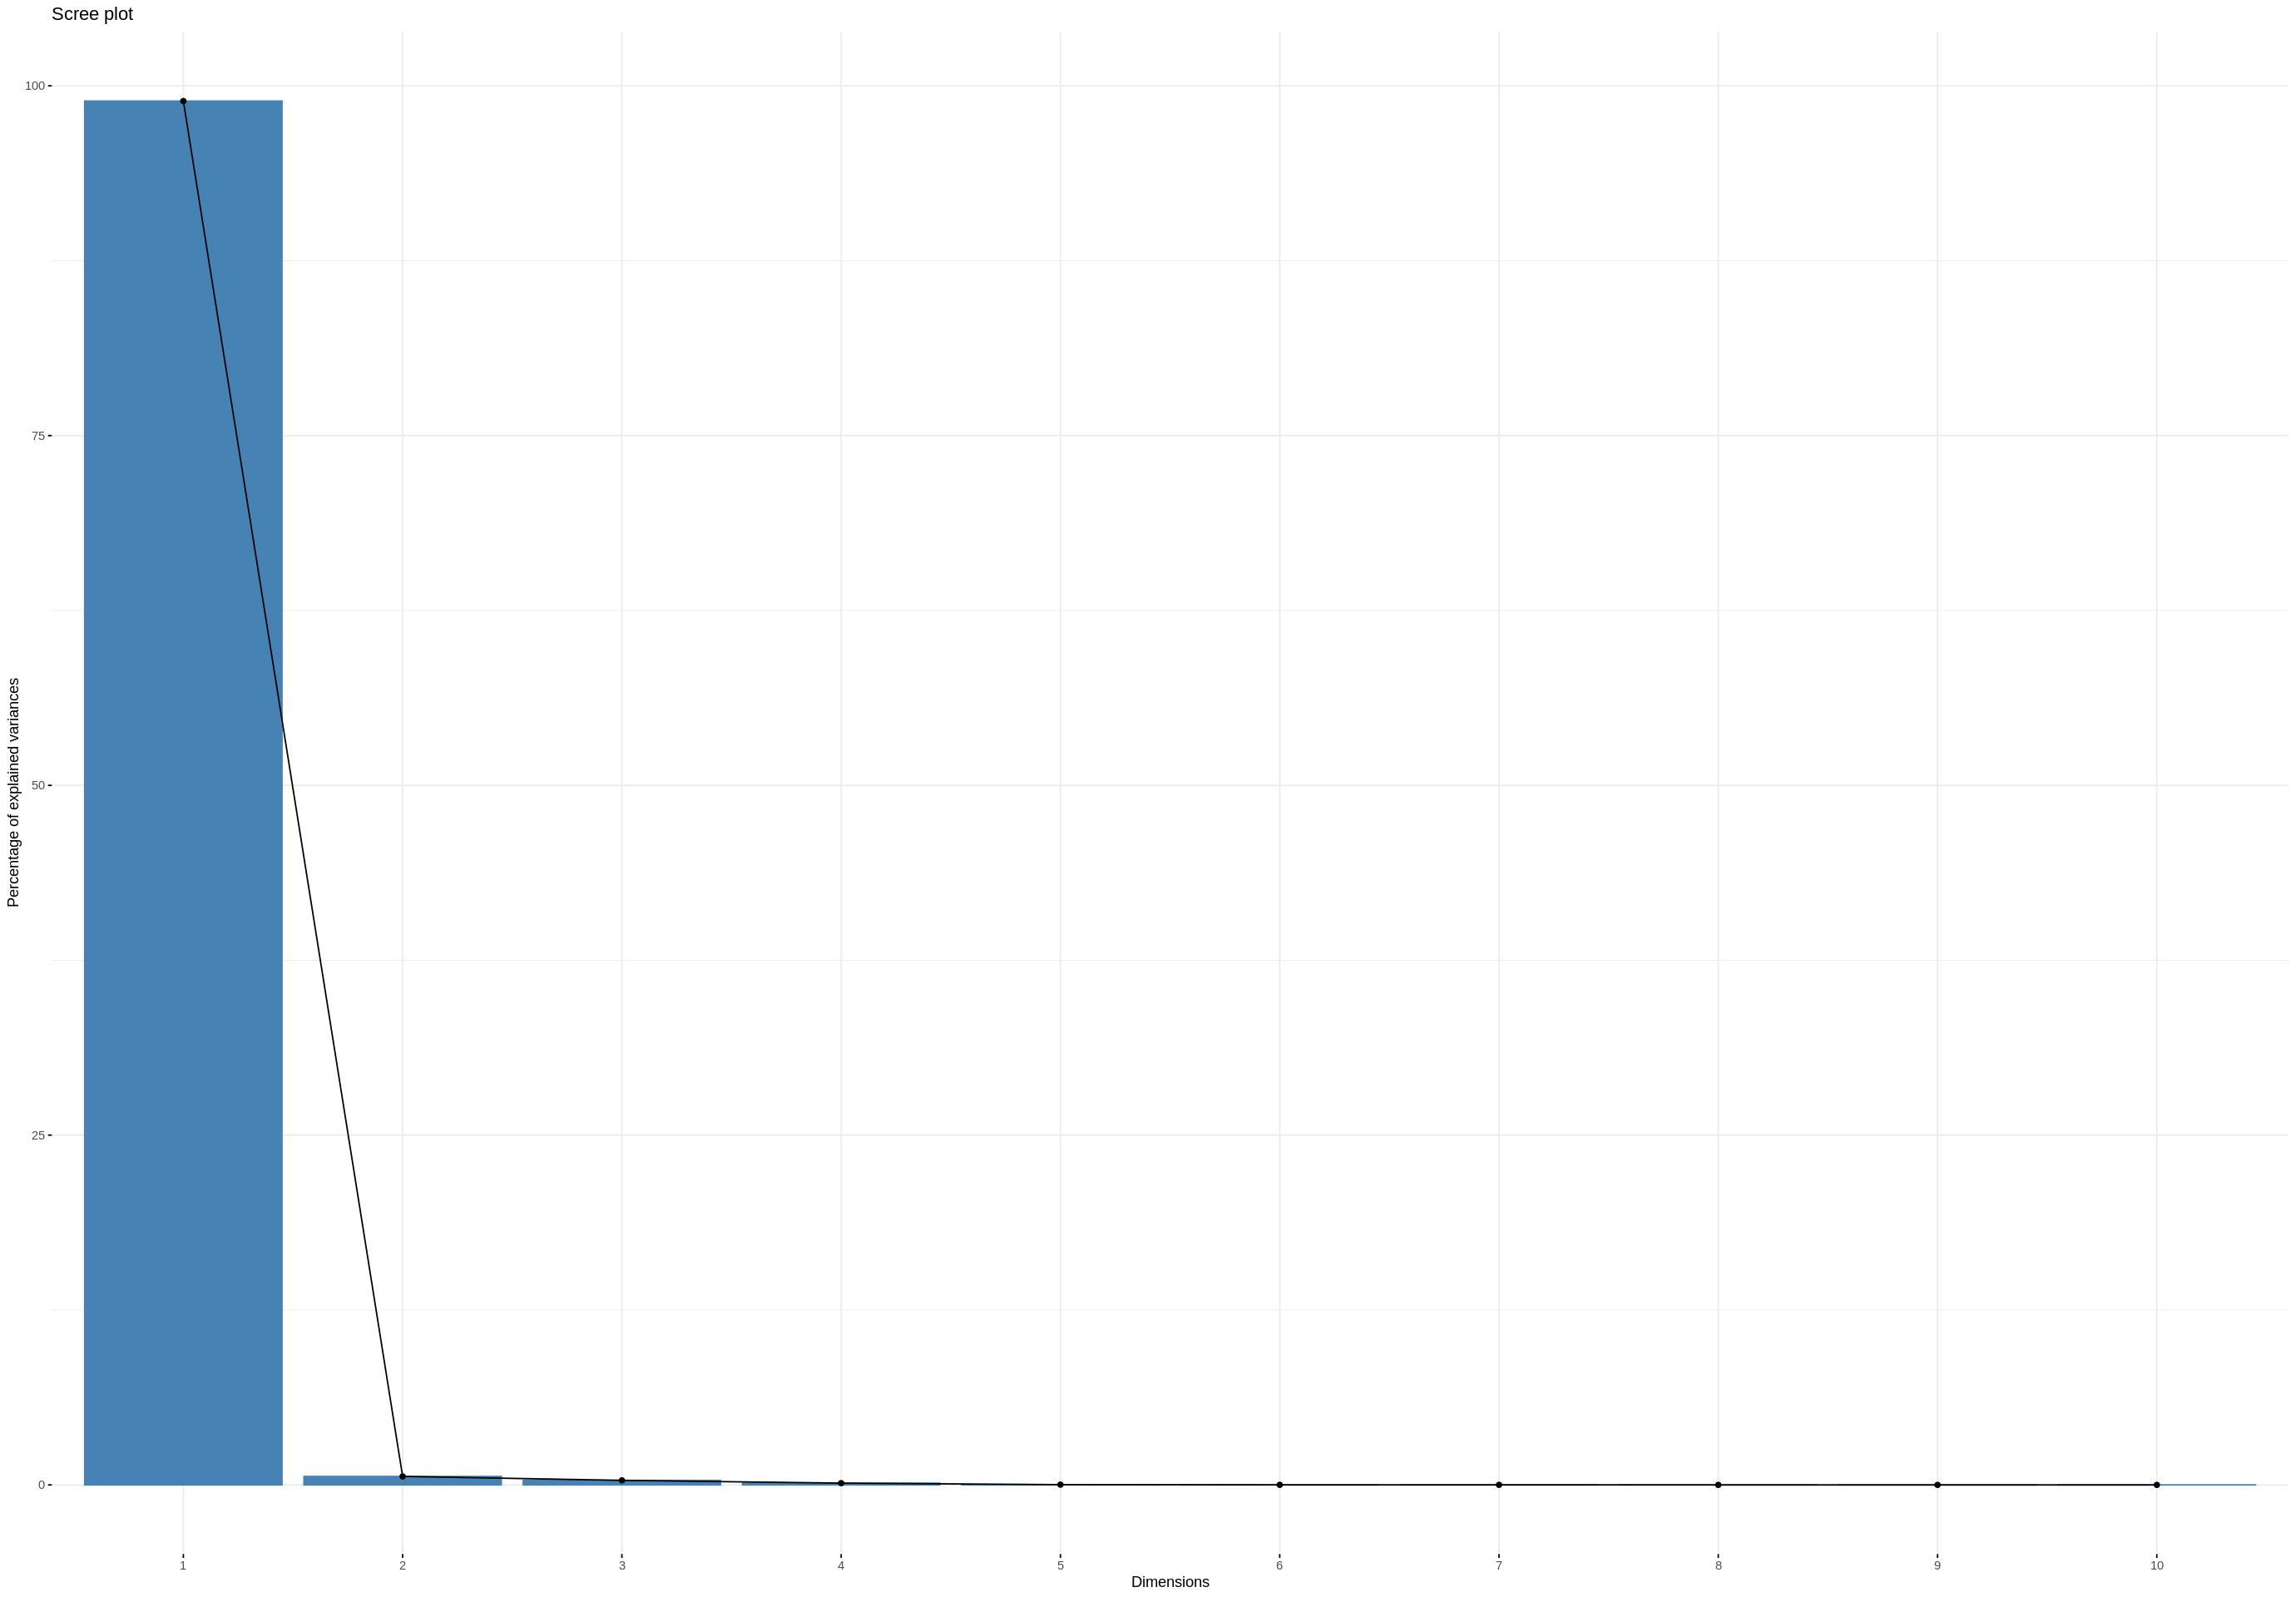

In [26]:
p<-fviz_eig(df_pca)
p
get_eig(df_pca)[c(1:5),]


In [27]:

myplots_ind<-function(compx=1, compy=2){
  a<-fviz_pca_ind(df_pca, 
                  axes = c(compx,compy),
                  geom.ind = c('point'),
                  fill.ind = df.train$genotype,
                  col.ind = df.train$genotype,
                  palette = colors,
                  addEllipses = T, 
                  legend.title = "Genotype",
                  repel=T)+
    theme_minimal()  + 
    theme(panel.grid = element_blank())+ 
    scale_shape_manual(values=seq(15,19))
  return(a)
}
myplots_var<-function(compx=1, compy=2){
  b<-fviz_pca_var(df_pca,
                  geom.var = c("arrow"),
                  axes=c(compx,compy),
                  col.var = "black",
                  labelsize = 5,
                  alpha.var=0.2,
                  repel=T)+
    theme_minimal()
  return(b)
}



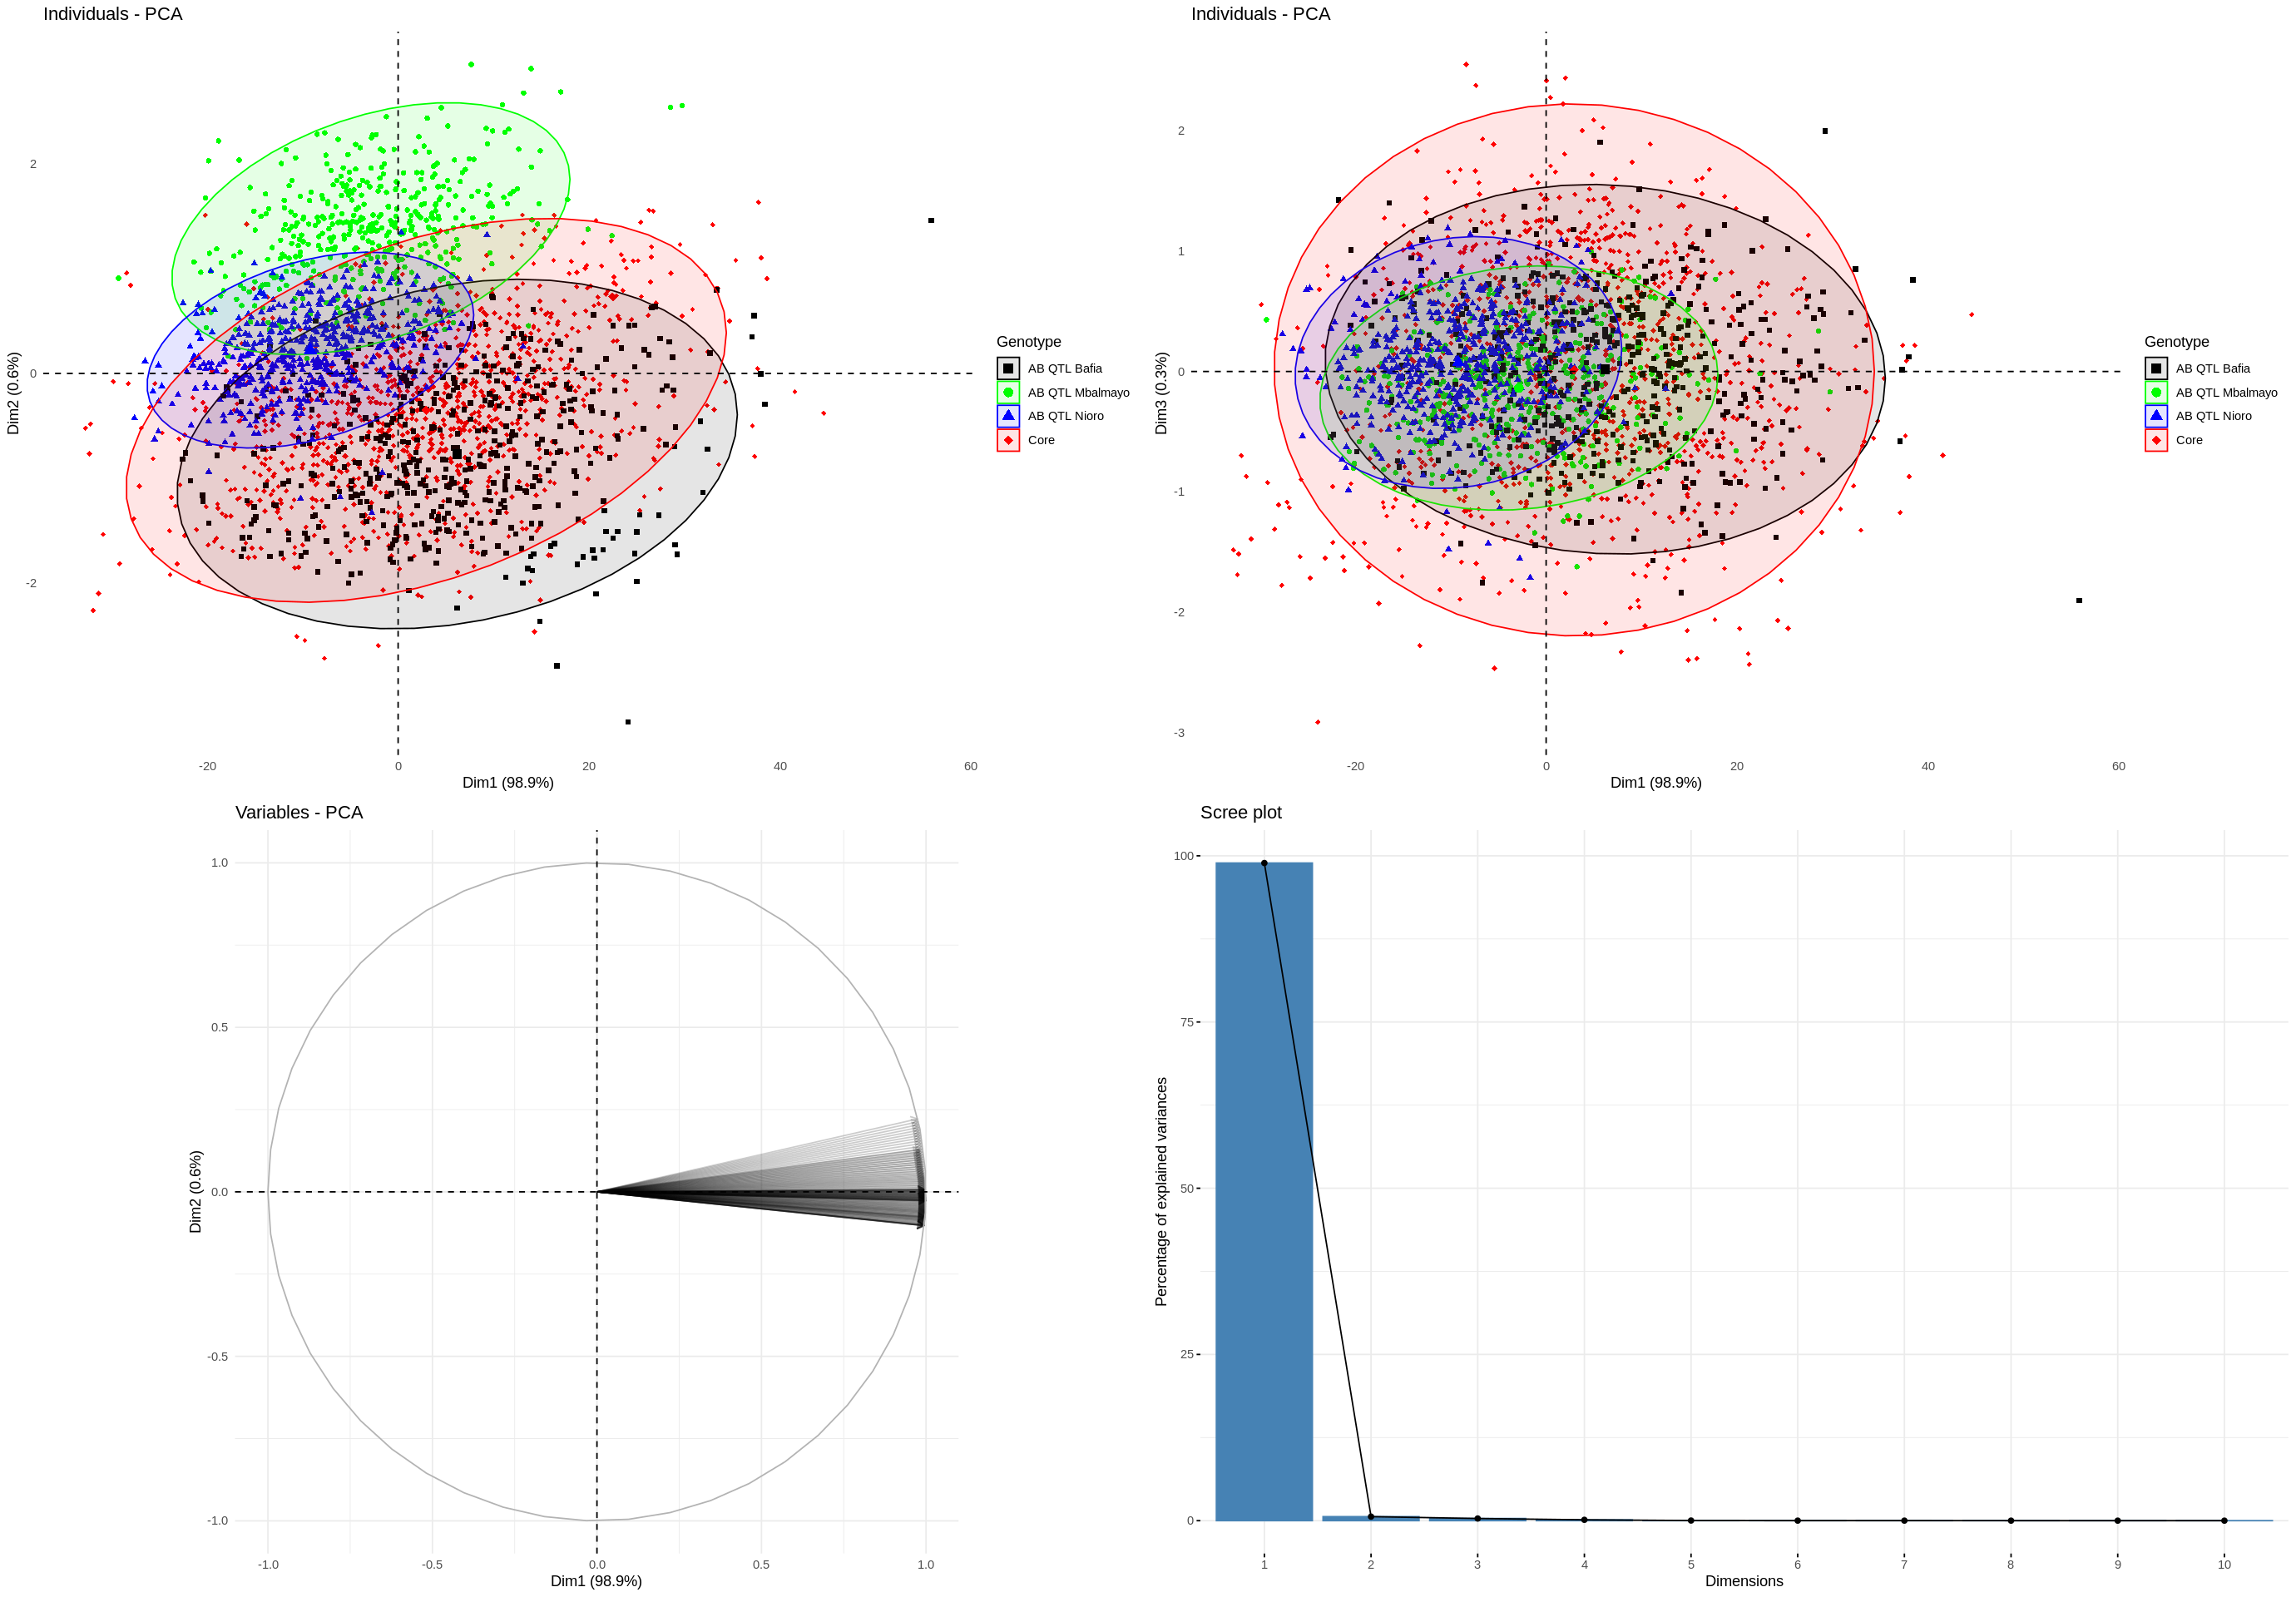

In [29]:
p1<-myplots_ind()
p2<-myplots_ind(compx = 1,compy = 3)

p3<-myplots_var()


ggarrange(p1, p2,p3,p,
          ncol = 2, nrow = 2)
